<a href="https://colab.research.google.com/github/atanasiusps/Machine-Learning-Enrichment_Task/blob/main/Chapter-17/Chapter_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CODE REPRODUCTION

import library

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "autoencoders"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

PCA with a linear Autoencoder

In [ ]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1.5))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 352ms/step - loss: 0.1164
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0613
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0510
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0564
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1419
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2277
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0388
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0174
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0147
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0148
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0152
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0150
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0139
Epoch 14/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0124
Epoch 15/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0111
Epoch 16/20
2/2 ━━━━━━━━━━━━━━━━━

In [ ]:
codings = encoder.predict(X_train)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Saving figure linear_autoencoder_pca_plot


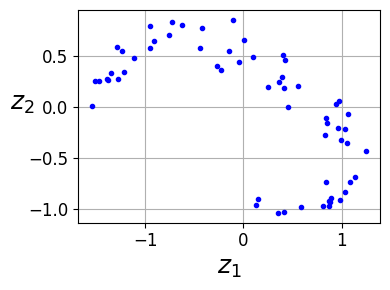

In [ ]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
save_fig("linear_autoencoder_pca_plot")
plt.show()

Stacked Autoencoders

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Train all layers at once

In [ ]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])
history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.3790 - rounded_accuracy: 0.8508 - val_loss: 0.3188 - val_rounded_accuracy: 0.8958
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3076 - rounded_accuracy: 0.9130 - val_loss: 0.3135 - val_rounded_accuracy: 0.8978
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2997 - rounded_accuracy: 0.9202 - val_loss: 0.3061 - val_rounded_accuracy: 0.9057
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2950 - rounded_accuracy: 0.9243 - val_loss: 0.2966 - val_rounded_accuracy: 0.9204
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2922 - rounded_accuracy: 0.9267 - val_loss: 0.2935 - val_rounded_accuracy: 0.9244
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2900 - rounded_accuracy: 0.9286 - val_loss: 0.2915 - val_rounded_accuracy: 0.9268
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2883 - rounded_accuracy: 0.9300 - val_loss: 0.2900 - val_rou

In [ ]:
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
Saving figure reconstruction_plot


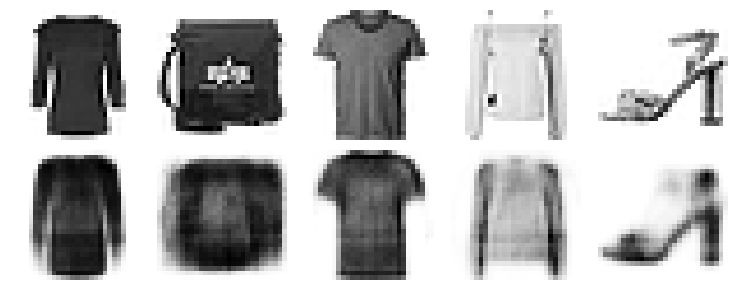

In [ ]:
show_reconstructions(stacked_ae)
save_fig("reconstruction_plot")

Visualizing Fashion MNIST

In [ ]:
np.random.seed(42)

from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


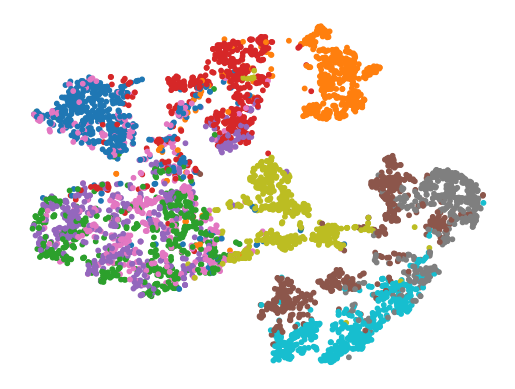

In [ ]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
plt.axis("off")
plt.show()

Saving figure fashion_mnist_visualization_plot


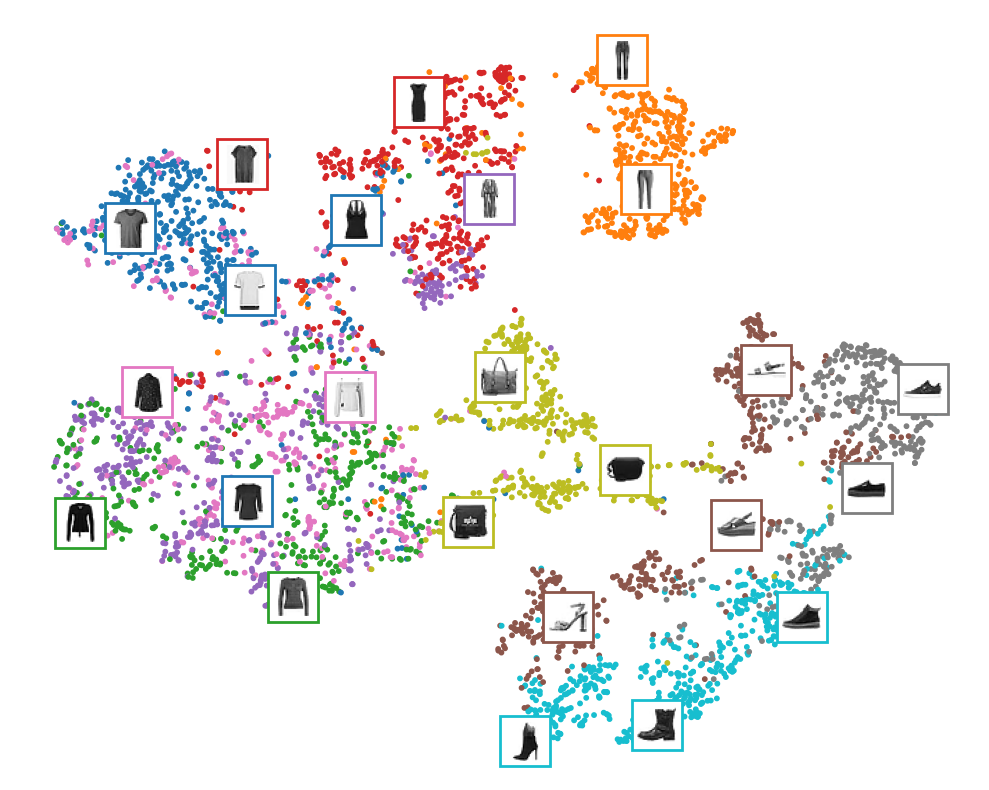

In [ ]:
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
save_fig("fashion_mnist_visualization_plot")
plt.show()


Tying weights

In [ ]:

class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias",
                                      shape=[self.dense.input_shape[-1]],
                                      initializer="zeros")
        super().build(batch_input_shape)
    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Reproducibility
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# Custom DenseTranspose layer
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.dense = dense
        self.activation = keras.activations.get(activation)

    def build(self, batch_input_shape):
        input_dim = int(self.dense.kernel.shape[0])
        self.biases = self.add_weight(name="bias",
                                      shape=[input_dim],
                                      initializer="zeros")
        super().build(batch_input_shape)

    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.kernel, transpose_b=True)
        return self.activation(z + self.biases)

# Optional rounded accuracy metric
def rounded_accuracy(y_true, y_pred):
    return tf.keras.metrics.binary_accuracy(y_true, tf.round(y_pred))

# Dense layers to share
dense_1 = keras.layers.Dense(100, activation="selu")
dense_2 = keras.layers.Dense(30, activation="selu")

# Encoder
tied_encoder = keras.models.Sequential([
    keras.Input(shape=[28, 28]),
    keras.layers.Flatten(),
    dense_1,
    dense_2
])

# Decoder with transposed weights
tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

# Autoencoder
tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])
tied_ae.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1.5),
                metrics=[rounded_accuracy])

# Load and normalize MNIST or similar dataset
(X_train_full, _), (X_test, _) = keras.datasets.mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255.0
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]

# Train
history = tied_ae.fit(X_train, X_train, epochs=10,
                      validation_data=(X_valid, X_valid))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.2057 - rounded_accuracy: 0.7846 - val_loss: 0.1189 - val_rounded_accuracy: 0.8121
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.1135 - rounded_accuracy: 0.8122 - val_loss: 0.1071 - val_rounded_accuracy: 0.8132
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1041 - rounded_accuracy: 0.8132 - val_loss: 0.1033 - val_rounded_accuracy: 0.8130
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1001 - rounded_accuracy: 0.8136 - val_loss: 0.1021 - val_rounded_accuracy: 0.8140
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0983 - rounded_accuracy: 0.8138 - val_loss: 0.0988 - val_rounded_accuracy: 0.8139
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0968 - rounded_accuracy: 0.8139 - val_loss: 0.0976 - val_rounded_accuracy: 0.8139
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0957 - ro

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


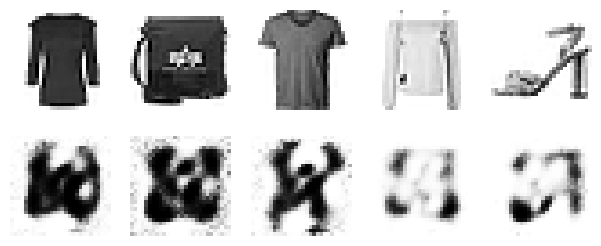

In [ ]:
show_reconstructions(tied_ae)
plt.show()

Training one Autoencoder at a Time

In [ ]:
def train_autoencoder(n_neurons, X_train, X_valid, loss, optimizer,
                      n_epochs=10, output_activation=None, metrics=None):
    n_inputs = X_train.shape[-1]
    encoder = keras.models.Sequential([
        keras.layers.Dense(n_neurons, activation="selu", input_shape=[n_inputs])
    ])
    decoder = keras.models.Sequential([
        keras.layers.Dense(n_inputs, activation=output_activation),
    ])
    autoencoder = keras.models.Sequential([encoder, decoder])
    autoencoder.compile(optimizer, loss, metrics=metrics)
    autoencoder.fit(X_train, X_train, epochs=n_epochs,
                    validation_data=(X_valid, X_valid))
    return encoder, decoder, encoder(X_train), encoder(X_valid)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

K = keras.backend
X_train_flat = K.batch_flatten(X_train) # equivalent to .reshape(-1, 28 * 28)
X_valid_flat = K.batch_flatten(X_valid)
enc1, dec1, X_train_enc1, X_valid_enc1 = train_autoencoder(
    100, X_train_flat, X_valid_flat, "binary_crossentropy",
    keras.optimizers.SGD(learning_rate=1.5), output_activation="sigmoid",
    metrics=[rounded_accuracy])
enc2, dec2, _, _ = train_autoencoder(
    30, X_train_enc1, X_valid_enc1, "mse", keras.optimizers.SGD(learning_rate=0.05),
    output_activation="selu")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2434 - rounded_accuracy: 0.7902 - val_loss: 0.1327 - val_rounded_accuracy: 0.8111
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1240 - rounded_accuracy: 0.8121 - val_loss: 0.1078 - val_rounded_accuracy: 0.8134
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1039 - rounded_accuracy: 0.8138 - val_loss: 0.0973 - val_rounded_accuracy: 0.8142
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0948 - rounded_accuracy: 0.8144 - val_loss: 0.0915 - val_rounded_accuracy: 0.8146
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0896 - rounded_accuracy: 0.8147 - val_loss: 0.0879 - val_rounded_accuracy: 0.8148
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0862 - rounded_accuracy: 0.8149 - val_loss: 0.0853 - val_rounded_accuracy: 0.8149
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0838 - rounded_accuracy: 0.8150 - val_loss: 0.0833 - val_rounded_accura

In [ ]:
stacked_ae_1_by_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    enc1, enc2, dec2, dec1,
    keras.layers.Reshape([28, 28])
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


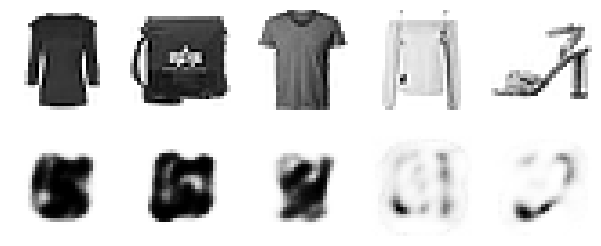

In [ ]:
show_reconstructions(stacked_ae_1_by_1)
plt.show()

In [ ]:

stacked_ae_1_by_1.compile(loss="binary_crossentropy",
                          optimizer=keras.optimizers.SGD(learning_rate=0.1), metrics=[rounded_accuracy])
history = stacked_ae_1_by_1.fit(X_train, X_train, epochs=10,
                                validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1165 - rounded_accuracy: 0.8120 - val_loss: 0.1143 - val_rounded_accuracy: 0.8122
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.1136 - rounded_accuracy: 0.8123 - val_loss: 0.1133 - val_rounded_accuracy: 0.8123
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1126 - rounded_accuracy: 0.8124 - val_loss: 0.1126 - val_rounded_accuracy: 0.8124
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1120 - rounded_accuracy: 0.8124 - val_loss: 0.1121 - val_rounded_accuracy: 0.8124
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1115 - rounded_accuracy: 0.8125 - val_loss: 0.1117 - val_rounded_accuracy: 0.8125
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1111 - rounded_accuracy: 0.8125 - val_loss: 0.1114 - val_rounded_accuracy: 0.8125
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1108 - rounded_accuracy: 0.8126 - val_loss: 0.1112 - val_rou

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


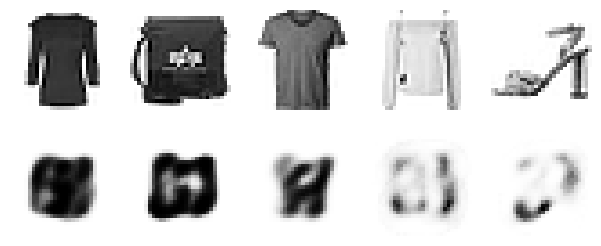

In [ ]:
show_reconstructions(stacked_ae_1_by_1)
plt.show()

Using Convolutional Layers Instead of Dense Layers

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                metrics=[rounded_accuracy])
history = conv_ae.fit(X_train, X_train, epochs=5,
                      validation_data=(X_valid, X_valid))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.1484 - rounded_accuracy: 0.8065 - val_loss: 0.0849 - val_rounded_accuracy: 0.8144
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0833 - rounded_accuracy: 0.8147 - val_loss: 0.0794 - val_rounded_accuracy: 0.8151
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0784 - rounded_accuracy: 0.8151 - val_loss: 0.0774 - val_rounded_accuracy: 0.8153
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0759 - rounded_accuracy: 0.8152 - val_loss: 0.0750 - val_rounded_accuracy: 0.8153
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0744 - rounded_accuracy: 0.8153 - val_loss: 0.0738 - val_rounded_accuracy: 0.8153


In [ ]:
conv_encoder.summary()
conv_decoder.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,296 (91.00 KB)

 Trainable params: 23,296 (91.00 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_transpose                │ (None, 7, 7, 32)       │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 14, 14, 16)     │         4,624 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 1)      │           145 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,233 (90.75 KB)

 Trainable params: 23,233 (90.75 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


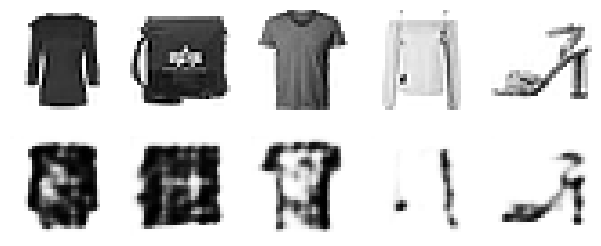

In [ ]:
show_reconstructions(conv_ae)
plt.show()

Recurrent Autoencoders

In [ ]:

recurrent_encoder = keras.models.Sequential([
    keras.layers.LSTM(100, return_sequences=True, input_shape=[28, 28]),
    keras.layers.LSTM(30)
])
recurrent_decoder = keras.models.Sequential([
    keras.layers.RepeatVector(28, input_shape=[30]),
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(28, activation="sigmoid"))
])
recurrent_ae = keras.models.Sequential([recurrent_encoder, recurrent_decoder])
recurrent_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(0.1),
                     metrics=[rounded_accuracy])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/repeat_vector.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:

history = recurrent_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - loss: 0.4116 - rounded_accuracy: 0.7867 - val_loss: 0.3165 - val_rounded_accuracy: 0.8088
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.3113 - rounded_accuracy: 0.8090 - val_loss: 0.3002 - val_rounded_accuracy: 0.8088
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.2977 - rounded_accuracy: 0.8090 - val_loss: 0.2928 - val_rounded_accuracy: 0.8088
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.2879 - rounded_accuracy: 0.8087 - val_loss: 0.2774 - val_rounded_accuracy: 0.8057
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.2745 - rounded_accuracy: 0.8052 - val_loss: 0.2637 - val_rounded_accuracy: 0.7973
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.2610 - rounded_accuracy: 0.7992 - val_loss: 0.2576 - val_rounded_accuracy: 0.7967
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.2554 - rounded_accuracy: 0.7963 - val_loss: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


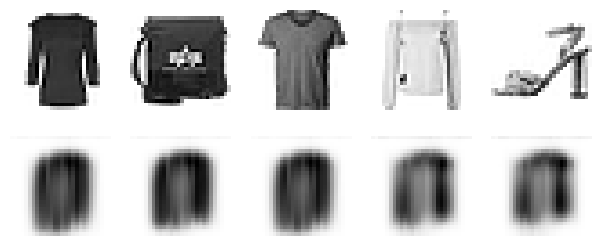

In [ ]:
show_reconstructions(recurrent_ae)
plt.show()

Stacked denoising Autoencoder

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

denoising_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])
denoising_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                     metrics=[rounded_accuracy])
history = denoising_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2529 - rounded_accuracy: 0.7829 - val_loss: 0.1532 - val_rounded_accuracy: 0.8057
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.1493 - rounded_accuracy: 0.8071 - val_loss: 0.1339 - val_rounded_accuracy: 0.8094
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1347 - rounded_accuracy: 0.8092 - val_loss: 0.1257 - val_rounded_accuracy: 0.8103
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1279 - rounded_accuracy: 0.8101 - val_loss: 0.1199 - val_rounded_accuracy: 0.8115
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1232 - rounded_accuracy: 0.8108 - val_loss: 0.1176 - val_rounded_accuracy: 0.8119
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1206 - rounded_accuracy: 0.8110 - val_loss: 0.1150 - val_rounded_accuracy: 0.8120
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1189 - rounded_accuracy: 0.8112 - val_loss: 0.1135 - val_rou

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


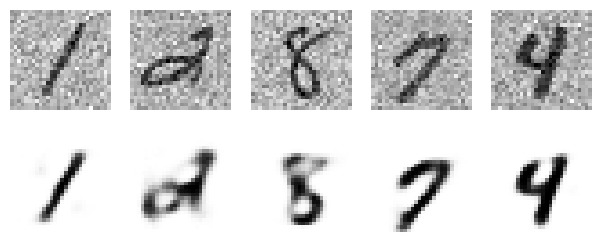

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

noise = keras.layers.GaussianNoise(0.2)
show_reconstructions(denoising_ae, noise(X_valid, training=True))
plt.show()

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

dropout_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
dropout_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
dropout_ae = keras.models.Sequential([dropout_encoder, dropout_decoder])
dropout_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                   metrics=[rounded_accuracy])
history = dropout_ae.fit(X_train, X_train, epochs=10,
                         validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.2570 - rounded_accuracy: 0.7817 - val_loss: 0.1578 - val_rounded_accuracy: 0.8054
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.1633 - rounded_accuracy: 0.8045 - val_loss: 0.1426 - val_rounded_accuracy: 0.8066
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1505 - rounded_accuracy: 0.8065 - val_loss: 0.1344 - val_rounded_accuracy: 0.8077
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1438 - rounded_accuracy: 0.8074 - val_loss: 0.1289 - val_rounded_accuracy: 0.8093
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1397 - rounded_accuracy: 0.8078 - val_loss: 0.1273 - val_rounded_accuracy: 0.8090
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1367 - rounded_accuracy: 0.8081 - val_loss: 0.1242 - val_rounded_accuracy: 0.8094
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1342 - rounded_accuracy: 0.8084 - val_loss: 0.1223 - val_rou

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Saving figure dropout_denoising_plot


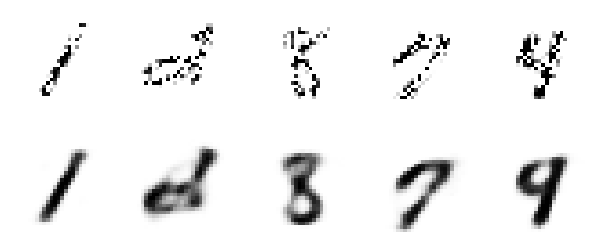

In [ ]:

tf.random.set_seed(42)
np.random.seed(42)

dropout = keras.layers.Dropout(0.5)
show_reconstructions(dropout_ae, dropout(X_valid, training=True))
save_fig("dropout_denoising_plot", tight_layout=False)

Sparse Autoencoder

In [ ]:

tf.random.set_seed(42)
np.random.seed(42)

simple_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="sigmoid"),
])
simple_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
simple_ae = keras.models.Sequential([simple_encoder, simple_decoder])
simple_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.),
                  metrics=[rounded_accuracy])
history = simple_ae.fit(X_train, X_train, epochs=10,
                        validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.3010 - rounded_accuracy: 0.7844 - val_loss: 0.2498 - val_rounded_accuracy: 0.8028
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.2430 - rounded_accuracy: 0.7994 - val_loss: 0.2211 - val_rounded_accuracy: 0.7984
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2111 - rounded_accuracy: 0.7985 - val_loss: 0.1915 - val_rounded_accuracy: 0.7994
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1865 - rounded_accuracy: 0.8007 - val_loss: 0.1753 - val_rounded_accuracy: 0.8021
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1727 - rounded_accuracy: 0.8030 - val_loss: 0.1659 - val_rounded_accuracy: 0.8039
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1639 - rounded_accuracy: 0.8046 - val_loss: 0.1598 - val_rounded_accuracy: 0.8051
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1578 - rounded_accuracy: 0.8056 - val_loss: 0.1538 - val_rou

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


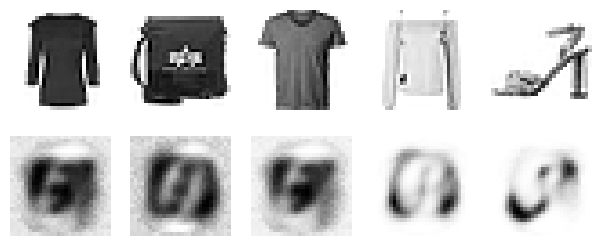

In [ ]:
show_reconstructions(simple_ae)
plt.show()

In [ ]:
def plot_percent_hist(ax, data, bins):
    counts, _ = np.histogram(data, bins=bins)
    widths = bins[1:] - bins[:-1]
    x = bins[:-1] + widths / 2
    ax.bar(x, counts / len(data), width=widths*0.8)
    ax.xaxis.set_ticks(bins)
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
        lambda y, position: "{}%".format(int(np.round(100 * y)))))
    ax.grid(True)

In [ ]:

def plot_activations_histogram(encoder, height=1, n_bins=10):
    X_valid_codings = encoder(X_valid).numpy()
    activation_means = X_valid_codings.mean(axis=0)
    mean = activation_means.mean()
    bins = np.linspace(0, 1, n_bins + 1)

    fig, [ax1, ax2] = plt.subplots(figsize=(10, 3), nrows=1, ncols=2, sharey=True)
    plot_percent_hist(ax1, X_valid_codings.ravel(), bins)
    ax1.plot([mean, mean], [0, height], "k--", label="Overall Mean = {:.2f}".format(mean))
    ax1.legend(loc="upper center", fontsize=14)
    ax1.set_xlabel("Activation")
    ax1.set_ylabel("% Activations")
    ax1.axis([0, 1, 0, height])
    plot_percent_hist(ax2, activation_means, bins)
    ax2.plot([mean, mean], [0, height], "k--")
    ax2.set_xlabel("Neuron Mean Activation")
    ax2.set_ylabel("% Neurons")
    ax2.axis([0, 1, 0, height])

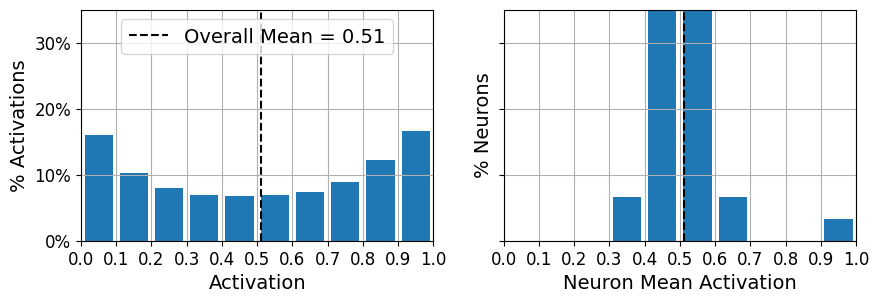

In [ ]:
plot_activations_histogram(simple_encoder, height=0.35)
plt.show()

In [ ]:

tf.random.set_seed(42)
np.random.seed(42)

sparse_l1_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid"),
    keras.layers.ActivityRegularization(l1=1e-3)  # Alternatively, you could add
                                                  # activity_regularizer=keras.regularizers.l1(1e-3)
                                                  # to the previous layer.
])
sparse_l1_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
sparse_l1_ae = keras.models.Sequential([sparse_l1_encoder, sparse_l1_decoder])
sparse_l1_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                     metrics=[rounded_accuracy])
history = sparse_l1_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.4637 - rounded_accuracy: 0.7762 - val_loss: 0.2645 - val_rounded_accuracy: 0.8039
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.2638 - rounded_accuracy: 0.8037 - val_loss: 0.2636 - val_rounded_accuracy: 0.8039
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2632 - rounded_accuracy: 0.8037 - val_loss: 0.2634 - val_rounded_accuracy: 0.8039
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2630 - rounded_accuracy: 0.8036 - val_loss: 0.2632 - val_rounded_accuracy: 0.8039
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2629 - rounded_accuracy: 0.8036 - val_loss: 0.2632 - val_rounded_accuracy: 0.8039
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2628 - rounded_accuracy: 0.8036 - val_loss: 0.2632 - val_rounded_accuracy: 0.8039
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2628 - rounded_accuracy: 0.8036 - val_loss: 0.2631 - val_rou

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


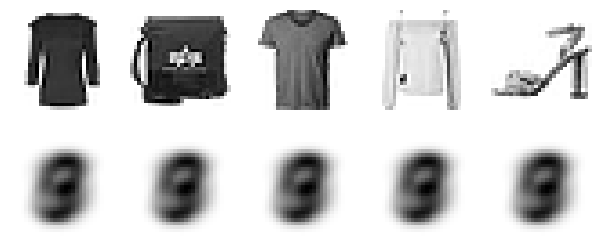

In [ ]:
show_reconstructions(sparse_l1_ae)

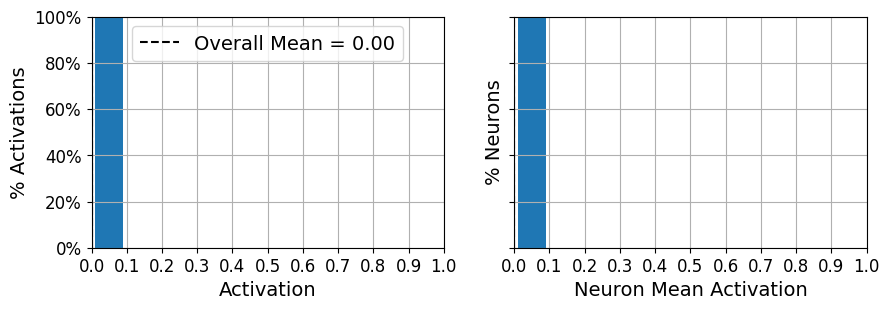

In [ ]:
plot_activations_histogram(sparse_l1_encoder, height=1.)
plt.show()

Saving figure sparsity_loss_plot


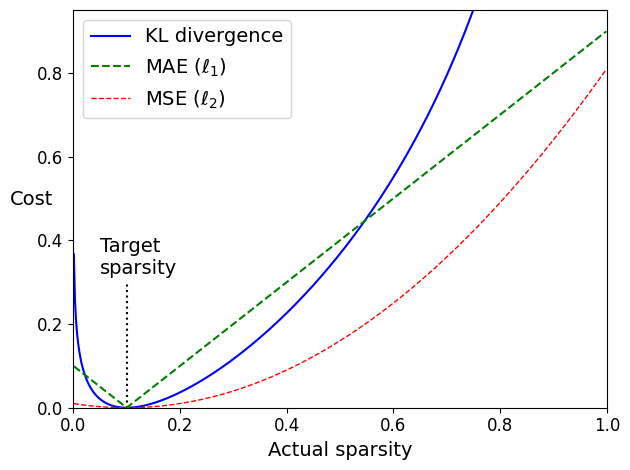

In [ ]:
p = 0.1
q = np.linspace(0.001, 0.999, 500)
kl_div = p * np.log(p / q) + (1 - p) * np.log((1 - p) / (1 - q))
mse = (p - q)**2
mae = np.abs(p - q)
plt.plot([p, p], [0, 0.3], "k:")
plt.text(0.05, 0.32, "Target\nsparsity", fontsize=14)
plt.plot(q, kl_div, "b-", label="KL divergence")
plt.plot(q, mae, "g--", label=r"MAE ($\ell_1$)")
plt.plot(q, mse, "r--", linewidth=1, label=r"MSE ($\ell_2$)")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("Actual sparsity")
plt.ylabel("Cost", rotation=0)
plt.axis([0, 1, 0, 0.95])
save_fig("sparsity_loss_plot")

In [ ]:
K = keras.backend
kl_divergence = keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(keras.regularizers.Regularizer):
    def __init__(self, weight, target=0.1):
        self.weight = weight
        self.target = target
    def __call__(self, inputs):
        mean_activities = K.mean(inputs, axis=0)
        return self.weight * (
            kl_divergence(self.target, mean_activities) +
            kl_divergence(1. - self.target, 1. - mean_activities))

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

kld_reg = KLDivergenceRegularizer(weight=0.05, target=0.1)
sparse_kl_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid", activity_regularizer=kld_reg)
])
sparse_kl_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
sparse_kl_ae = keras.models.Sequential([sparse_kl_encoder, sparse_kl_decoder])
sparse_kl_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
              metrics=[rounded_accuracy])
history = sparse_kl_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.3844 - rounded_accuracy: 0.7818 - val_loss: 0.2614 - val_rounded_accuracy: 0.8017
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2535 - rounded_accuracy: 0.7998 - val_loss: 0.2522 - val_rounded_accuracy: 0.7970
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.2470 - rounded_accuracy: 0.7967 - val_loss: 0.2470 - val_rounded_accuracy: 0.7976
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2403 - rounded_accuracy: 0.7981 - val_loss: 0.2365 - val_rounded_accuracy: 0.7980
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2254 - rounded_accuracy: 0.7984 - val_loss: 0.2274 - val_rounded_accuracy: 0.7977
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2126 - rounded_accuracy: 0.7987 - val_loss: 0.2179 - val_rounded_accuracy: 0.7985
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2035 - rounded_accuracy: 0.8001 - val_loss: 0.2101 - val_rou

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


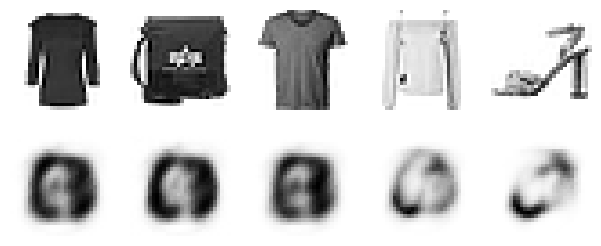

In [ ]:
show_reconstructions(sparse_kl_ae)

Saving figure sparse_autoencoder_plot


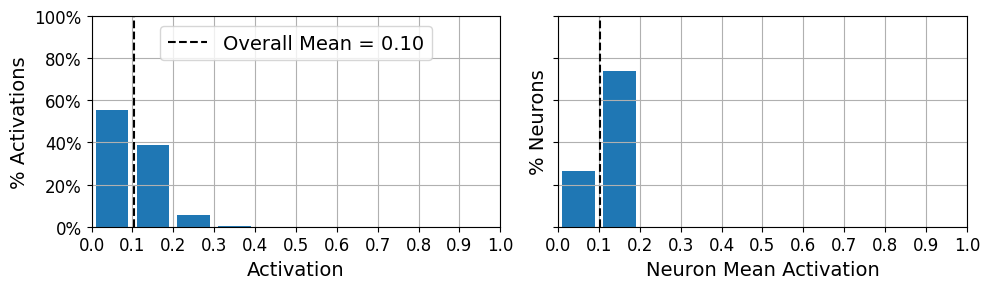

In [ ]:
plot_activations_histogram(sparse_kl_encoder)
save_fig("sparse_autoencoder_plot")
plt.show()

Variational Autoencoder

In [ ]:
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

# Reproducibility
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 10

# Custom Sampling layer with KL divergence loss
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        codings_mean, codings_log_var = inputs
        epsilon = tf.random.normal(tf.shape(codings_mean))
        z = codings_mean + tf.exp(0.5 * codings_log_var) * epsilon

        # Compute the KL divergence loss
        kl_loss = -0.5 * tf.reduce_sum(
            1 + codings_log_var - tf.square(codings_mean) - tf.exp(codings_log_var),
            axis=1
        )
        self.add_loss(tf.reduce_mean(kl_loss) / 784.0)  # Normalize by number of pixels
        return z

# Encoder
inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(inputs=inputs,
                                         outputs=[codings_mean, codings_log_var, codings])

# Decoder
decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.models.Model(inputs=decoder_inputs, outputs=outputs)

# VAE Model
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=inputs, outputs=reconstructions)

# Optional rounded accuracy metric
def rounded_accuracy(y_true, y_pred):
    return tf.keras.metrics.binary_accuracy(y_true, tf.round(y_pred))

variational_ae.compile(loss="binary_crossentropy",
                       optimizer="rmsprop",
                       metrics=[rounded_accuracy])

# Load data
(X_train_full, _), (X_test, _) = keras.datasets.mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255.0
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]

# Train
history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128,
                             validation_data=(X_valid, X_valid))


Epoch 1/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.3067 - rounded_accuracy: 0.7759 - val_loss: 0.2155 - val_rounded_accuracy: 0.7980
Epoch 2/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2093 - rounded_accuracy: 0.7991 - val_loss: 0.1934 - val_rounded_accuracy: 0.8052
Epoch 3/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1891 - rounded_accuracy: 0.8032 - val_loss: 0.1820 - val_rounded_accuracy: 0.8061
Epoch 4/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1806 - rounded_accuracy: 0.8043 - val_loss: 0.1774 - val_rounded_accuracy: 0.8058
Epoch 5/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1756 - rounded_accuracy: 0.8050 - val_loss: 0.1741 - val_rounded_accuracy: 0.8071
Epoch 6/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1717 - rounded_accuracy: 0.8056 - val_loss: 0.1694 - val_rounded_accuracy: 0.8069
Epoch 7/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1684 - rounded_accuracy: 0.8062 - val_loss: 0.1664 - val_rounded_accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step


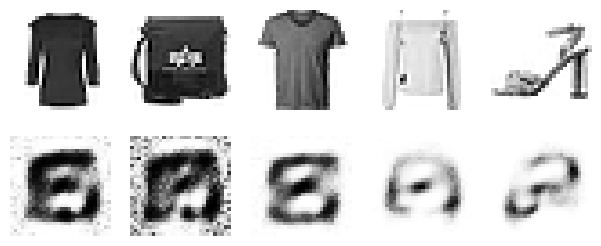

In [ ]:
show_reconstructions(variational_ae)
plt.show()

Generate Fashion Images

In [ ]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

Saving figure vae_generated_images_plot


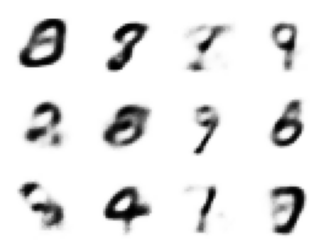

In [ ]:

tf.random.set_seed(42)

codings = tf.random.normal(shape=[12, codings_size])
images = variational_decoder(codings).numpy()
plot_multiple_images(images, 4)
save_fig("vae_generated_images_plot", tight_layout=False)

Saving figure semantic_interpolation_plot


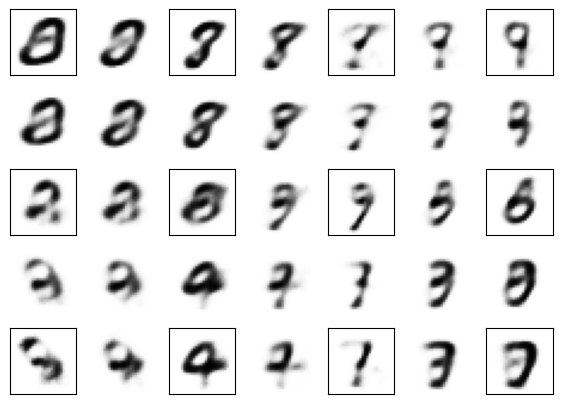

In [ ]:

tf.random.set_seed(42)
np.random.seed(42)

codings_grid = tf.reshape(codings, [1, 3, 4, codings_size])
larger_grid = tf.image.resize(codings_grid, size=[5, 7])
interpolated_codings = tf.reshape(larger_grid, [-1, codings_size])
images = variational_decoder(interpolated_codings).numpy()

plt.figure(figsize=(7, 5))
for index, image in enumerate(images):
    plt.subplot(5, 7, index + 1)
    if index%7%2==0 and index//7%2==0:
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
    else:
        plt.axis("off")
    plt.imshow(image, cmap="binary")
save_fig("semantic_interpolation_plot", tight_layout=False)

Generative Adversarial Networks

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 30

generator = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[codings_size]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

In [ ]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))              # not shown in the book
        for X_batch in dataset:
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        plot_multiple_images(generated_images, 8)                     # not shown
        plt.show()                                                    # not shown

Epoch 1/1


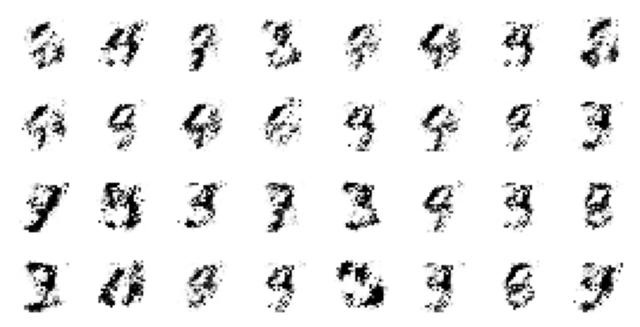

In [ ]:
train_gan(gan, dataset, batch_size, codings_size, n_epochs=1)

Saving figure gan_generated_images_plot


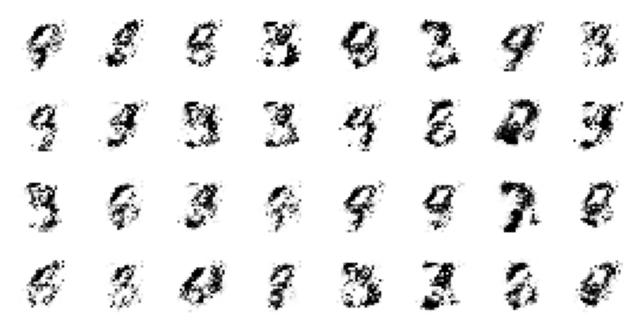

In [ ]:

tf.random.set_seed(42)
np.random.seed(42)

noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator(noise)
plot_multiple_images(generated_images, 8)
save_fig("gan_generated_images_plot", tight_layout=False)

In [ ]:
# train_gan(gan, dataset, batch_size, codings_size)

TIDAK AKAN DIJALANKAN KARENA MENYEBABKAN CRASH


Deep Convolutional GAN

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 100

generator = keras.models.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape=[codings_size]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME",
                                 activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="SAME",
                                 activation="tanh"),
])
discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2),
                        input_shape=[28, 28, 1]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [ ]:
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. - 1. # reshape and rescale

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train_dcgan)
dataset = dataset.shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
# train_gan(gan, dataset, batch_size, codings_size)

TIDAK AKAN DIJALANKAN KARENA MENYEBABKAN CRASH

Saving figure dcgan_generated_images_plot


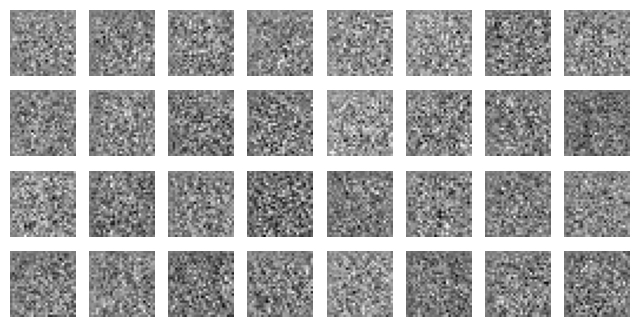

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator(noise)
plot_multiple_images(generated_images, 8)
save_fig("dcgan_generated_images_plot", tight_layout=False)

Extra Material

Hashing Using a Binary Autoencoder

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

hashing_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.GaussianNoise(0.3),  # Adjusted noise stddev
    keras.layers.Dense(16, activation="sigmoid"),
])

hashing_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[16]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
hashing_ae = keras.models.Sequential([hashing_encoder, hashing_decoder])
hashing_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Nadam(),
                   metrics=[rounded_accuracy])
history = hashing_ae.fit(X_train, X_train, epochs=10,
                         validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.3912 - rounded_accuracy: 0.4934 - val_loss: 0.3129 - val_rounded_accuracy: 0.5013
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3089 - rounded_accuracy: 0.5058 - val_loss: 0.3023 - val_rounded_accuracy: 0.5032
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3005 - rounded_accuracy: 0.5070 - val_loss: 0.2976 - val_rounded_accuracy: 0.5037
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2961 - rounded_accuracy: 0.5076 - val_loss: 0.2954 - val_rounded_accuracy: 0.5037
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2935 - rounded_accuracy: 0.5078 - val_loss: 0.2933 - val_rounded_accuracy: 0.5041
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2916 - rounded_accuracy: 0.5080 - val_loss: 0.2920 - val_rounded_accuracy: 0.5041
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2902 - rounded_accuracy: 0.5081 - val_loss: 0.2908 - val_ro

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


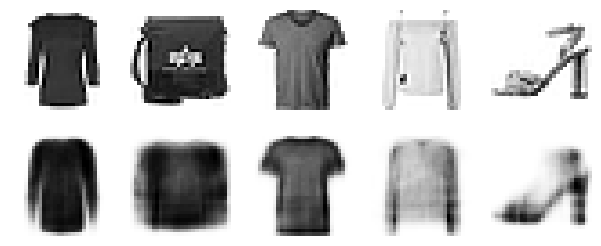

In [ ]:
show_reconstructions(hashing_ae)
plt.show()

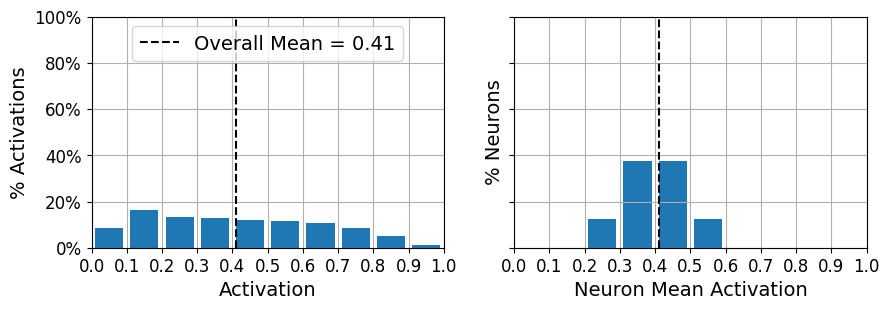

In [ ]:
plot_activations_histogram(hashing_encoder)
plt.show()

In [ ]:
hashes = np.round(hashing_encoder.predict(X_valid)).astype(np.int32)
hashes *= np.array([[2**bit for bit in range(16)]])
hashes = hashes.sum(axis=1)
for h in hashes[:5]:
    print("{:016b}".format(h))
print("...")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
0101011010001000
0000000000001000
1000010011000000
0000000101000000
0000101001011001
...


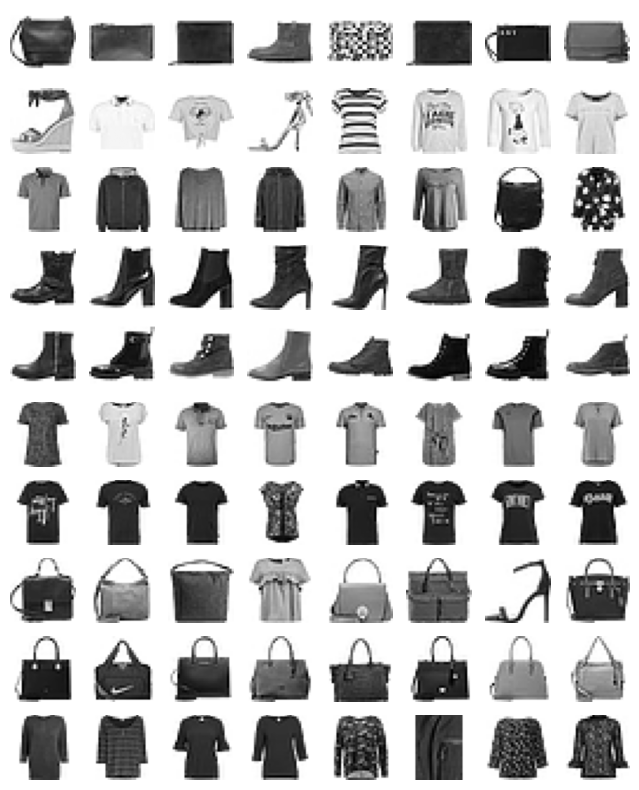

In [ ]:

from collections import Counter

n_hashes = 10
n_images = 8

top_hashes = Counter(hashes).most_common(n_hashes)

plt.figure(figsize=(n_images, n_hashes))
for hash_index, (image_hash, hash_count) in enumerate(top_hashes):
    indices = (hashes == image_hash)
    for index, image in enumerate(X_valid[indices][:n_images]):
        plt.subplot(n_hashes, n_images, hash_index * n_images + index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

## EXERCISE

**1. What are the main tasks that autoencoders are used for?**  
Autoencoder biasanya digunakan untuk:
- Reduksi dimensi (seperti PCA namun nonlinier)  
- Denoising untuk membersihkan input dari noise  
- Deteksi anomali dengan memanfaatkan error rekonstruksi  
- Pretraining model neural network pada pembelajaran semi-supervised  
- Kompresi dan rekonstruksi data seperti gambar  
- Generasi data baru, misalnya dengan variational autoencoder (VAE)  
<br>

**2. Suppose you want to train a classifier, and you have plenty of unlabeled training data but only a few thousand labeled instances. How can autoencoders help? How would you proceed?**  
Autoencoder dapat dilatih secara unsupervised pada data tanpa label untuk mendapatkan representasi laten. Kemudian:
- Gunakan encoder untuk mengekstrak fitur dari data berlabel  
- Latih classifier pada fitur tersebut  
- Opsional: lakukan fine-tuning seluruh model jika diperlukan  
<br>

**3. If an autoencoder perfectly reconstructs the inputs, is it necessarily a good autoencoder? How can you evaluate the performance of an autoencoder?**  
Tidak selalu. Autoencoder bisa saja hanya menghafal data tanpa memahami struktur penting. Evaluasi bisa dilakukan dengan:
- Mengamati loss rekonstruksi pada data validasi  
- Menggunakan representasi untuk tugas lain (misal klasifikasi)  
- Mendeteksi anomali dari error rekonstruksi  
<br>

**4. What are undercomplete and overcomplete autoencoders? What is the main risk of an excessively undercomplete autoencoder? What about the main risk of an overcomplete autoencoder?**  
Undercomplete autoencoder memiliki bottleneck lebih kecil dari input; risikonya adalah kehilangan informasi penting.  
Overcomplete autoencoder memiliki dimensi laten lebih besar; risikonya adalah model hanya menghafal input.  
<br>

**5. How do you tie weights in a stacked autoencoder? What is the point of doing so?**  
Dengan menyetel bobot decoder sebagai transpose dari bobot encoder. Tujuannya untuk:
- Mengurangi parameter  
- Memaksimalkan efisiensi dan regularisasi  
<br>

**6. What is a generative model? Can you name a type of generative autoencoder?**  
Model generatif adalah model yang bisa menghasilkan data baru menyerupai data pelatihan. Salah satu jenisnya adalah **Variational Autoencoder (VAE)**.  
<br>

**7. What is a GAN? Can you name a few tasks where GANs can shine?**  
GAN (Generative Adversarial Network) adalah model dengan dua komponen—generator dan discriminator—yang saling bersaing. GAN cocok untuk:
- Membuat gambar sintetis realistis  
- Image-to-image translation  
- Super-resolution  
- Style transfer  
<br>

**8. What are the main difficulties when training GANs?**  
- Ketidakseimbangan antara generator dan discriminator  
- Mode collapse: generator menghasilkan data yang seragam  
- Ketidakstabilan pelatihan  
- Sulit mengevaluasi kualitas hasil  
<br>


9. Try using a denoising autoencoder to pretrain an image classifier. You can use
MNIST (the simplest option), or a more complex image dataset such as CIFAR10
if you want a bigger challenge. Regardless of the dataset you’re using, follow these
steps:

• Split the dataset into a training set and a test set. Train a deep denoising
autoencoder on the full training set.

• Check that the images are fairly well reconstructed. Visualize the images that
most activate each neuron in the coding layer.

• Build a classification DNN, reusing the lower layers of the autoencoder. Train
it using only 500 images from the training set. Does it perform better with or
without pretraining?


In [ ]:
[X_train, y_train], [X_test, y_test] = keras.datasets.cifar10.load_data()
X_train = X_train / 255
X_test = X_test / 255

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

denoising_encoder = keras.models.Sequential([
    keras.layers.GaussianNoise(0.1, input_shape=[32, 32, 3]),
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
denoising_encoder.summary()

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gaussian_noise_4                │ (None, 32, 32, 3)      │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 512)            │     4,194,816 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,195,712 (16.01 MB)

 Trainable params: 4,195,712 (16.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(16 * 16 * 32, activation="relu", input_shape=[512]),
    keras.layers.Reshape([16, 16, 32]),
    keras.layers.Conv2DTranspose(filters=3, kernel_size=3, strides=2,
                                 padding="same", activation="sigmoid")
])

In [ ]:
denoising_decoder.summary()

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 8192)           │     4,202,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_13 (Reshape)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 32, 32, 3)      │           867 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,203,363 (16.03 MB)

 Trainable params: 4,203,363 (16.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])
denoising_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Nadam(),
                     metrics=["mse"])
history = denoising_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_test, X_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.6051 - mse: 0.0237 - val_loss: 0.6029 - val_mse: 0.0208
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.5717 - mse: 0.0095 - val_loss: 0.5849 - val_mse: 0.0138
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.5679 - mse: 0.0080 - val_loss: 0.5804 - val_mse: 0.0119
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.5665 - mse: 0.0075 - val_loss: 0.5794 - val_mse: 0.0116
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.5658 - mse: 0.0073 - val_loss: 0.5740 - val_mse: 0.0096
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.5653 - mse: 0.0071 - val_loss: 0.5709 - val_mse: 0.0086
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.5649 - mse: 0.0070 - val_loss: 0.5681 - val_mse: 0.0078
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.5646 - mse: 0.0069 - val_loss: 0.5687 - val_mse: 0.0080
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step


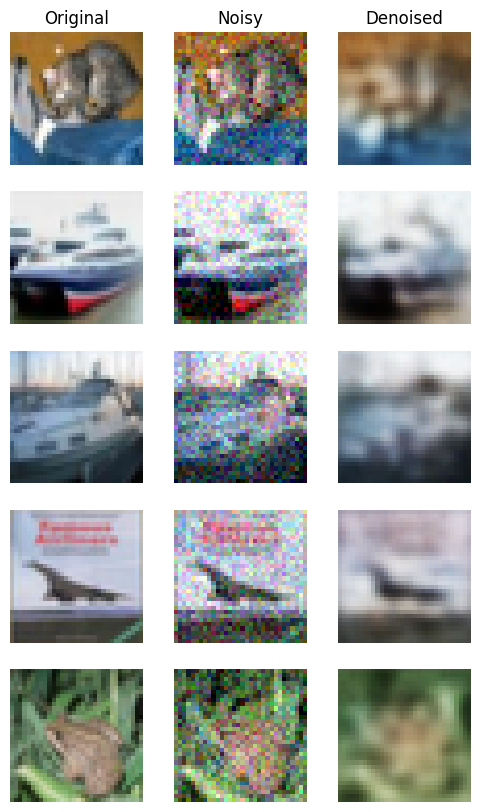

In [ ]:
n_images = 5
new_images = X_test[:n_images]
new_images_noisy = new_images + np.random.randn(n_images, 32, 32, 3) * 0.1
new_images_denoised = denoising_ae.predict(new_images_noisy)

plt.figure(figsize=(6, n_images * 2))
for index in range(n_images):
    plt.subplot(n_images, 3, index * 3 + 1)
    plt.imshow(new_images[index])
    plt.axis('off')
    if index == 0:
        plt.title("Original")
    plt.subplot(n_images, 3, index * 3 + 2)
    plt.imshow(np.clip(new_images_noisy[index], 0., 1.))
    plt.axis('off')
    if index == 0:
        plt.title("Noisy")
    plt.subplot(n_images, 3, index * 3 + 3)
    plt.imshow(new_images_denoised[index])
    plt.axis('off')
    if index == 0:
        plt.title("Denoised")
plt.show()

10. Train a variational autoencoder on the image dataset of your choice, and use it to
generate images. Alternatively, you can try to find an unlabeled dataset that you
are interested in and see if you can generate new samples.

In [ ]:
pip install torch torchvision matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 38.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

class VAE(nn.Module):
    def __init__(self, latent_dim=20):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 400)
        self.fc21 = nn.Linear(400, latent_dim)  # mean
        self.fc22 = nn.Linear(400, latent_dim)  # log variance
        self.fc3 = nn.Linear(latent_dim, 400)
        self.fc4 = nn.Linear(400, 28 * 28)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 28 * 28))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar


In [ ]:
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 28 * 28), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.optim as optim

transform = transforms.ToTensor()
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

epochs = 10
model.train()
for epoch in range(epochs):
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    print(f'Epoch {epoch + 1}, Loss: {train_loss / len(train_loader.dataset):.4f}')


100%|██████████| 9.91M/9.91M [00:01<00:00, 5.10MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 66.7kB/s]
100%|██████████| 1.65M/1.65M [00:06<00:00, 242kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.62MB/s]


Epoch 1, Loss: 164.2630
Epoch 2, Loss: 121.3121
Epoch 3, Loss: 114.4405
Epoch 4, Loss: 111.4142
Epoch 5, Loss: 109.7308
Epoch 6, Loss: 108.5899
Epoch 7, Loss: 107.6488
Epoch 8, Loss: 106.9989
Epoch 9, Loss: 106.4921
Epoch 10, Loss: 106.0502


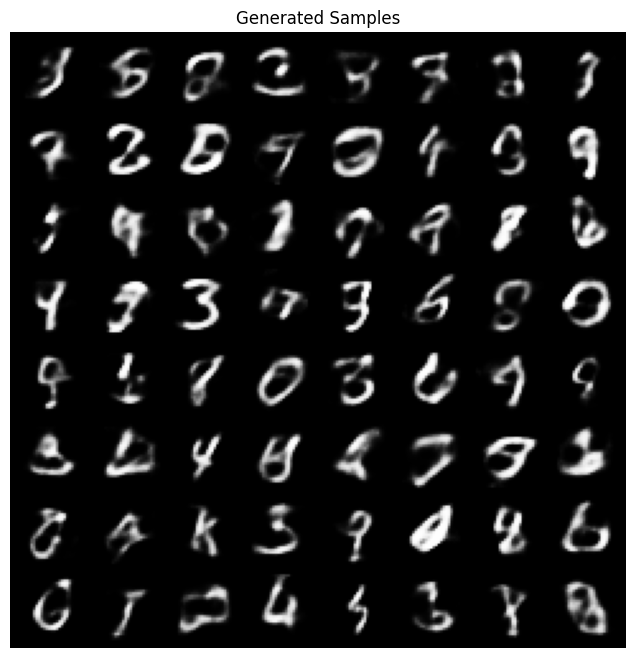

In [ ]:
import matplotlib.pyplot as plt
import torchvision  # ✅ Needed for make_grid

model.eval()
with torch.no_grad():
    z = torch.randn(64, 20).to(device)
    sample = model.decode(z).cpu()
    sample = sample.view(64, 1, 28, 28)

    grid_img = torchvision.utils.make_grid(sample, nrow=8)
    plt.figure(figsize=(8, 8))
    plt.imshow(grid_img.permute(1, 2, 0).squeeze(), cmap='gray')
    plt.axis('off')
    plt.title('Generated Samples')
    plt.show()


11. Train a DCGAN to tackle the image dataset of your choice, and use it to generate
images. Add experience replay and see if this helps. Turn it into a conditional
GAN where you can control the generated class.


In [ ]:
pip install torch torchvision matplotlib


In [ ]:
import torch
from torch import nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt


In [ ]:
transform = transforms.Compose([
    transforms.Resize(64),             # ✅ Resize to 64x64
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5]) # Normalize to [-1, 1]
])

dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)


In [ ]:
class Generator(nn.Module):
    def __init__(self, nz=100, ngf=64, nc=1):
        super().__init__()
        self.net = nn.Sequential(
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),  # (100,1,1) -> (512,4,4)
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),  # -> (256,8,8)
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),  # -> (128,16,16)
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),      # -> (64,32,32)
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=False),           # -> (1,64,64)
            nn.Tanh()
        )

    def forward(self, x):
        return self.net(x)


In [ ]:
class Discriminator(nn.Module):
    def __init__(self, ndf=64, nc=1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),  # -> (64,32,32)
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),  # -> (128,16,16)
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),  # -> (256,8,8)
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),  # -> (512,4,4)
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),  # -> (1,1,1)
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x).view(-1)  # Flatten output to (batch,)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

netG = Generator().to(device)
netD = Discriminator().to(device)

criterion = nn.BCELoss()
optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

nz = 100  # Latent vector size

for epoch in range(10):
    for i, (real_imgs, _) in enumerate(dataloader):
        b_size = real_imgs.size(0)
        real_imgs = real_imgs.to(device)

        # Train Discriminator
        netD.zero_grad()
        output_real = netD(real_imgs)
        real_label = torch.ones_like(output_real, device=device)
        lossD_real = criterion(output_real, real_label)

        z = torch.randn(b_size, nz, 1, 1, device=device)
        fake_imgs = netG(z)
        output_fake = netD(fake_imgs.detach())
        fake_label = torch.zeros_like(output_fake, device=device)
        lossD_fake = criterion(output_fake, fake_label)

        lossD = lossD_real + lossD_fake
        lossD.backward()
        optimizerD.step()

        # Train Generator
        netG.zero_grad()
        output = netD(fake_imgs)
        label_G = torch.ones_like(output, device=device)
        lossG = criterion(output, label_G)
        lossG.backward()
        optimizerG.step()

    print(f"Epoch {epoch+1}: Loss_D={lossD.item():.4f}, Loss_G={lossG.item():.4f}")


Epoch 1: Loss_D=0.3240, Loss_G=2.1705
Epoch 2: Loss_D=0.4850, Loss_G=2.1164
Epoch 3: Loss_D=0.0373, Loss_G=8.4635
Epoch 4: Loss_D=0.3128, Loss_G=4.8581
Epoch 5: Loss_D=5.4185, Loss_G=0.6773
Epoch 6: Loss_D=0.3320, Loss_G=5.5361
Epoch 7: Loss_D=0.0595, Loss_G=4.2059
Epoch 8: Loss_D=0.1495, Loss_G=6.5306
Epoch 9: Loss_D=0.1488, Loss_G=3.2617
Epoch 10: Loss_D=0.1641, Loss_G=2.9877


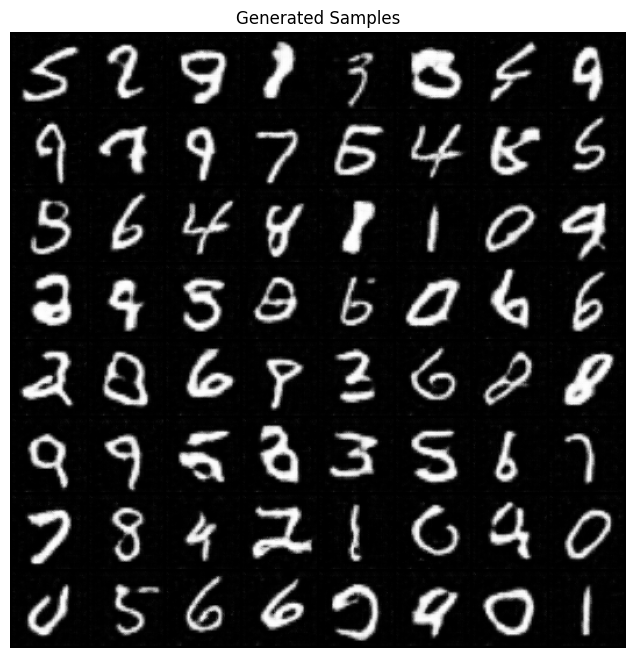

In [ ]:
import torchvision.utils as vutils

netG.eval()
with torch.no_grad():
    z = torch.randn(64, nz, 1, 1, device=device)
    fake_imgs = netG(z).detach().cpu()
    grid = vutils.make_grid(fake_imgs, padding=2, normalize=True, nrow=8)

    plt.figure(figsize=(8, 8))
    plt.imshow(grid.permute(1, 2, 0).squeeze())
    plt.axis('off')
    plt.title('Generated Samples')
    plt.show()